## 1. Plotting Actions

### The exercise
1. Think of a player who you enjoyed watching at the recent mens Euros 2024 or women's World Cup 2023.
2. What actions did they perform that were important and why?
3. Download data from Statsbomb for the tournamentsLinks to an external site.. Plot the actions and describe how the data supports or contradicts your own analysis.
4. Compare the players (using statistical methods) to other players in the tournament.
5. Write a short text using at most two figures that illustrate your point.

   
The hand-in should be at most two pages, including figures. Submit one file only.

This is a graded exercise. 8/50 points in the final grade. (plus 2/50 for reviews).

Join the slack groupLinks to an external site. for the course to discuss this exercise.

Post a draft of your exercise to the Slack group on Monday 9th for feedback from Pegah on Wednesday 11th.

### The Peer Reviews
You review 3 of your peers submissions. You should write one or two sentences about each of:

Technical: what are the positive and negative 

Insight: How much insight does this give you in to the player?

Presentation: Are the results intuitive and easy to understand?

Please be positive and constructive in your feedback. I do the grading, you provide useful feedback.

The peer review is a graded exercise. 2/50 points in the final grade.

#### Euro 2024: Nico Williams

In [75]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch
import pandas as pd
import numpy as np

In [9]:
parser = Sbopen()
df_match = parser.match(competition_id=55, season_id=282)

In [315]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         51 non-null     int64         
 1   match_date                       51 non-null     datetime64[ns]
 2   kick_off                         51 non-null     datetime64[ns]
 3   home_score                       51 non-null     int64         
 4   away_score                       51 non-null     int64         
 5   match_status                     51 non-null     object        
 6   match_status_360                 51 non-null     object        
 7   last_updated                     51 non-null     datetime64[ns]
 8   last_updated_360                 51 non-null     datetime64[ns]
 9   match_week                       51 non-null     int64         
 10  competition_id                   51 non-null     int64         


In [41]:
df_matches_spain = df_match[(df_match['home_team_name'] == 'Spain') | (df_match['away_team_name'] == 'Spain')]
df_matches_spain

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
1,3943043,2024-07-14,2024-07-14 22:00:00,2,1,available,available,2024-07-15 15:48:50.315500,2024-07-15 15:52:24.778809,7,...,26,Final,367,Olympiastadion Berlin,85,Germany,79,François Letexier,78,France
2,3942752,2024-07-09,2024-07-09 22:00:00,2,1,available,available,2024-07-10 08:51:07.032303,2024-07-10 13:01:26.597509,6,...,15,Semi-finals,4867,Allianz Arena,85,Germany,943,Slavko Vinčić,208,Slovenia
8,3942226,2024-07-05,2024-07-05 19:00:00,2,1,available,available,2024-07-13 03:52:05.176875,2024-07-13 03:52:43.383929,5,...,11,Quarter-finals,369,MHPArena,85,Germany,8,Anthony Taylor,68,England
15,3941018,2024-06-30,2024-06-30 22:00:00,4,1,available,available,2024-07-12 06:06:58.963038,2024-07-12 06:08:12.572176,4,...,33,Round of 16,363,RheinEnergieStadion,85,Germany,79,François Letexier,78,France
18,3930179,2024-06-24,2024-06-24 22:00:00,0,1,available,available,2024-07-01 06:01:14.238710,2024-07-01 06:07:22.418137,3,...,10,Group Stage,4866,Merkur Spiel-Arena,85,Germany,1062,Glenn Nyberg,220,Sweden
23,3930172,2024-06-20,2024-06-20 22:00:00,1,0,available,available,2024-07-12 00:15:20.599402,2024-07-12 00:16:51.275112,2,...,10,Group Stage,370,VELTINS-Arena,85,Germany,943,Slavko Vinčić,208,Slovenia
48,3930160,2024-06-15,2024-06-15 19:00:00,3,0,available,available,2024-07-12 03:36:29.899268,2024-07-12 03:40:20.513429,1,...,10,Group Stage,367,Olympiastadion Berlin,85,Germany,1,Michael Oliver,68,England


In [282]:
df_matches_england = df_match[(df_match['home_team_name'] == 'England') | (df_match['away_team_name'] == 'England')]
df_matches_england

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3942819,2024-07-10,2024-07-10 22:00:00,1,2,available,available,2024-07-15 07:54:23.583297,2024-07-15 07:57:36.684453,6,...,15,Semi-finals,373,Signal-Iduna-Park,85,Germany,241,Felix Zwayer,85,Germany
1,3943043,2024-07-14,2024-07-14 22:00:00,2,1,available,available,2024-07-15 15:48:50.315500,2024-07-15 15:52:24.778809,7,...,26,Final,367,Olympiastadion Berlin,85,Germany,79,François Letexier,78,France
6,3930171,2024-06-20,2024-06-20 19:00:00,1,1,available,available,2024-07-12 05:16:00.445930,2024-07-12 05:19:44.572914,2,...,10,Group Stage,116458,Deutsche Bank Park,85,Germany,2445,Artur Manuel Ribeiro Soares Dias,183,Portugal
7,3942227,2024-07-06,2024-07-06 19:00:00,1,1,available,available,2024-07-14 15:55:52.682165,2024-07-14 15:57:51.414762,5,...,11,Quarter-finals,4866,Merkur Spiel-Arena,85,Germany,269,Daniele Orsato,112,Italy
16,3941017,2024-06-30,2024-06-30 19:00:00,2,1,available,available,2024-07-10 11:29:00.136519,2024-07-10 11:31:44.852038,4,...,33,Round of 16,370,VELTINS-Arena,85,Germany,845,Halil Umut Meler,233,Turkey
38,3930181,2024-06-25,2024-06-25 22:00:00,0,0,available,available,2024-07-10 14:26:49.966712,2024-07-10 14:27:59.561474,3,...,10,Group Stage,363,RheinEnergieStadion,85,Germany,76,Clément Turpin,78,France
46,3930163,2024-06-16,2024-06-16 22:00:00,0,1,available,available,2024-07-14 07:08:44.634374,2024-07-14 07:10:41.937955,1,...,10,Group Stage,370,VELTINS-Arena,85,Germany,269,Daniele Orsato,112,Italy


In [42]:
df_spain_matches = {}
for i, id in enumerate(list(df_matches_spain['match_id'])):
  df_spain_matches[id] = {}
  df_spain_matches[id]['event'], df_spain_matches[id]['related'], df_spain_matches[id]['freeze'], df_spain_matches[id]['tactic'] = parser.event(id)

In [321]:
df_spain_matches[match_id]['related']

,match_id,id,index,type_name,id_related,index_related,type_name_related
0,3943043,d2126e70-9f04-4bb7-ba2b-9377836d1757,3,Half Start,54d78bfa-4146-42bd-acdc-97bcd393dd81,4,Half Start
1,3943043,54d78bfa-4146-42bd-acdc-97bcd393dd81,4,Half Start,d2126e70-9f04-4bb7-ba2b-9377836d1757,3,Half Start
2,3943043,152820f0-6ca9-4df3-943b-a67d568ff472,5,Pass,d64668c7-747c-4a7d-912c-e1c3ff357a67,6,Ball Receipt
3,3943043,d64668c7-747c-4a7d-912c-e1c3ff357a67,6,Ball Receipt,152820f0-6ca9-4df3-943b-a67d568ff472,5,Pass
4,3943043,9c107df3-a3c8-4ad5-bc35-00214087a105,7,Carry,237201b8-aef8-4823-b282-e82875795c07,8,Pass
...,...,...,...,...,...,...,...
4903,3943043,e5ae52ae-396a-427a-bd42-74dd09d2baf8,3282,Ball Receipt,b61343cd-46ef-4331-8a91-c548a2643472,3283,Carry
4910,3943043,1c7cd4b9-106b-4cd8-a5f0-e21ed22ab739,3291,Foul Won,704295e3-c1e2-4318-a0c7-c1fa3eb9d65b,3288,Carry
4911,3943043,24bd6c69-be52-4039-919d-f94faec93853,3287,Ball Recovery,704295e3-c1e2-4318-a0c7-c1fa3eb9d65b,3288,Carry
4930,3943043,4e0b58f4-24a8-4ddd-b709-d71832480808,3302,Ball Recovery,c11721ac-1ddd-4a7d-8ee9-6ba005b6380f,3303,Carry


In [284]:
df_england_matches = {}
for i, id in enumerate(list(df_matches_england['match_id'])):
  df_england_matches[id] = {}
  df_england_matches[id]['event'], df_england_matches[id]['related'], df_england_matches[id]['freeze'], df_england_matches[id]['tactic'] = parser.event(id)

In [287]:
df_england_matches[]

AttributeError: 'dict' object has no attribute 'unique'

In [269]:
df_spain_matches[3942226]['event'].head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,pass_goal_assist,ball_recovery_offensive,foul_committed_advantage,foul_won_advantage,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,pass_deflected,injury_stoppage_in_chain,shot_one_on_one
0,1ce9d7ce-6df0-40ca-af14-307df5ff886e,1,1,00:00:00,0,0,1,0.000000,3942226,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c47708d5-f1ff-4899-81df-24398b4a2537,2,1,00:00:00,0,0,1,0.000000,3942226,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a6229c43-8030-4e79-a63d-8fc75e40b3b5,3,1,00:00:00,0,0,1,0.000000,3942226,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,012dca26-712a-4b7a-be43-1b15121b6ed4,4,1,00:00:00,0,0,1,0.000000,3942226,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,047d50bf-37e4-4373-92b9-a47e0ace5ae8,5,1,00:00:01.291000,0,1,2,0.645908,3942226,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
len(df_spain_matches[3942226]['event'])

4463

In [267]:
df_spain_matches[3942226]['event']['type_name'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Ball Recovery', 'Pressure', 'Duel', 'Goal Keeper', 'Miscontrol',
       'Shot', 'Foul Committed', 'Foul Won', 'Injury Stoppage',
       'Player Off', 'Player On', 'Block', 'Dribbled Past', 'Dribble',
       'Interception', 'Substitution', 'Clearance', 'Dispossessed',
       '50/50', 'Half End', 'Tactical Shift', 'Bad Behaviour', 'Error',
       'Referee Ball-Drop'], dtype=object)

### Passing Network Functions

In [270]:
def clean_names(df, team_name):
    #check for index of first sub
    sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == team_name].iloc[0]["index"]
    #make df with successfull passes by England until the first substitution
    mask_df = (df.type_name == 'Pass') & (df.team_name == team_name) & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
    #taking necessary columns
    df_pass = df.loc[mask_df, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
    #adjusting that only the surname of a player is presented.
    df_pass["player_name"] = df_pass["player_name"].apply(lambda x: str(x).split()[-1])
    df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])
    return df_pass

def calculate_edges_width(df_pass):
    #counting passes between players
    df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
    lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
    lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
    #setting a treshold. You can try to investigate how it changes when you change it.
    lines_df = lines_df[lines_df['pass_count']>2]
    return lines_df
    

def calculate_vertices(df_pass):
    scatter_df = pd.DataFrame()
    for i, name in enumerate(df_pass["player_name"].unique()):
        passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
        recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
        passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
        recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
        scatter_df.at[i, "player_name"] = name
        #make sure that x and y location for each circle representing the player is the average of passes and receptions
        scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
        scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
        #calculate number of passes
        scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]
    
    #adjust the size of a circle so that the player who made more passes 
    scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)
    return scatter_df

def plot_pass_network(scatter_df, lines_df, title):
    #plot once again pitch and vertices
    pitch = Pitch(line_color='grey')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
    for i, row in scatter_df.iterrows():
        pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)
        
    for i, row in lines_df.iterrows():
            player1 = row["pair_key"].split("_")[0]
            player2 = row['pair_key'].split("_")[1]
            #take the average location of players to plot a line between them 
            player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
            player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
            player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
            player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
            num_passes = row["pass_count"]
            #adjust the line width so that the more passes, the wider the line
            line_width = (num_passes / lines_df['pass_count'].max() * 10)
            #plot lines on the pitch
            pitch.lines(player1_x, player1_y, player2_x, player2_y,
                            alpha=1, lw=line_width, zorder=2, color="red", ax = ax["pitch"])
    
    fig.suptitle(title, fontsize = 30)
    plt.show()

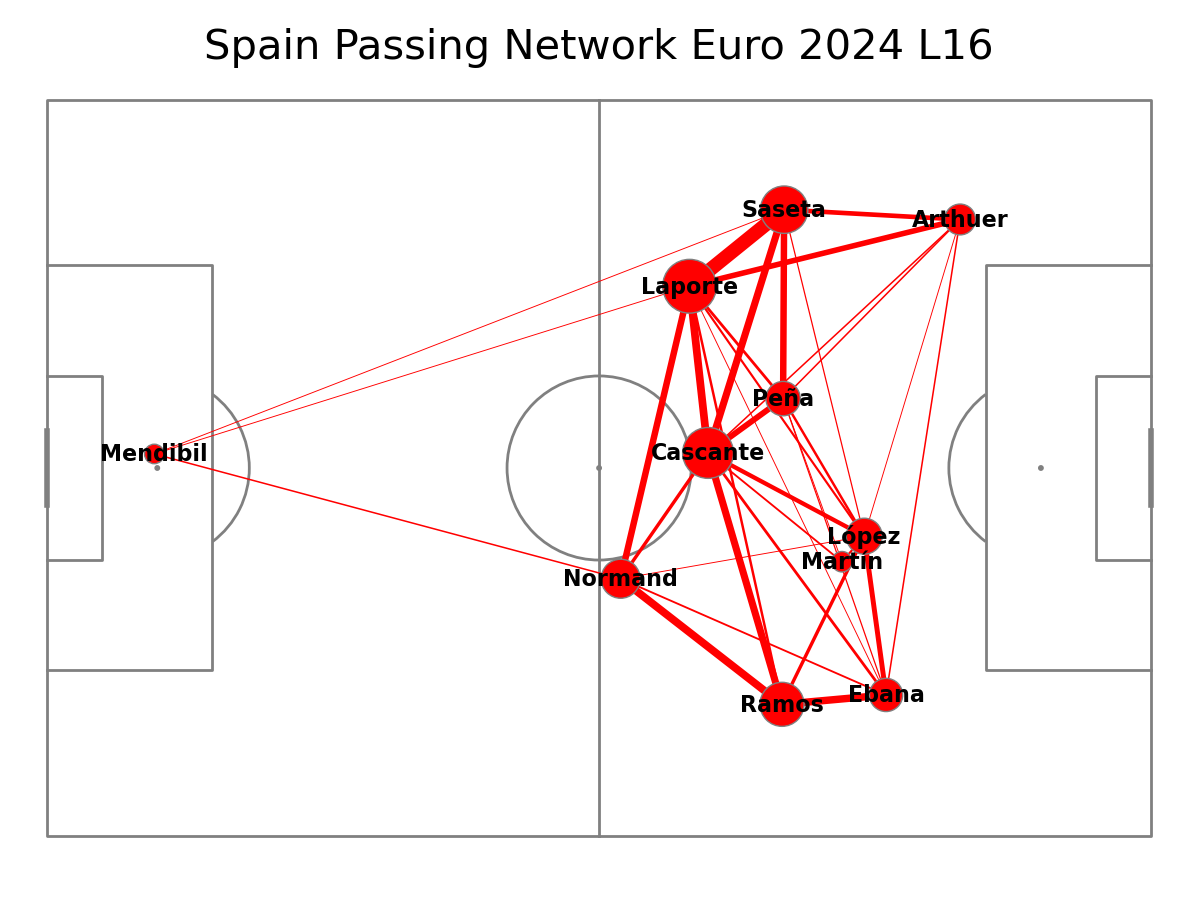

In [274]:
df_names_cleaned = clean_names(df_spain_matches[3941018]['event'], 'Spain')
df_edges = calculate_edges_width(df_names_cleaned)
df_vertices = calculate_vertices(df_names_cleaned)
plot_pass_network(df_vertices, df_edges, 'Spain Passing Network Euro 2024 L16')

In [254]:
df_spain_matches[3943043]['event']['player_name'].unique()

array([nan, 'Kobbie Mainoo', 'Jordan Pickford', 'Bukayo Saka',
       'Unai Simón Mendibil', 'Robin Aime Robert Le Normand',
       'Daniel Carvajal Ramos', 'Jude Bellingham', 'Declan Rice',
       'Daniel Olmo Carvajal', 'Álvaro Borja Morata Martín',
       'Lamine Yamal Nasraoui Ebana', 'Marc Guehi', 'Phil Foden',
       'Rodrigo Hernández Cascante', 'Aymeric Laporte', 'Kyle Walker',
       'Luke Shaw', 'Harry Kane', 'John Stones',
       'Nicholas Williams Arthuer', 'Marc Cucurella Saseta',
       'Fabián Ruiz Peña', 'Martín Zubimendi Ibáñez', 'Ollie Watkins',
       'Mikel Oyarzabal Ugarte', 'Cole Palmer',
       'José Ignacio Fernández Iglesias', 'Ivan Toney',
       'Mikel Merino Zazón'], dtype=object)

In [111]:
def plot_player_passes(df, player_name, title):
    mask_bronze = (df.type_name == 'Pass') & (df.player_name == player_name)
    df_pass = df.loc[mask_bronze, ['x', 'y', 'end_x', 'end_y']]
    
    pitch = Pitch(line_color='black')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    pitch.arrows(df_pass.x, df_pass.y,
                df_pass.end_x, df_pass.end_y, color = "blue", ax=ax['pitch'])
    pitch.scatter(df_pass.x, df_pass.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
    fig.suptitle(title, fontsize = 30) 
    plt.show()

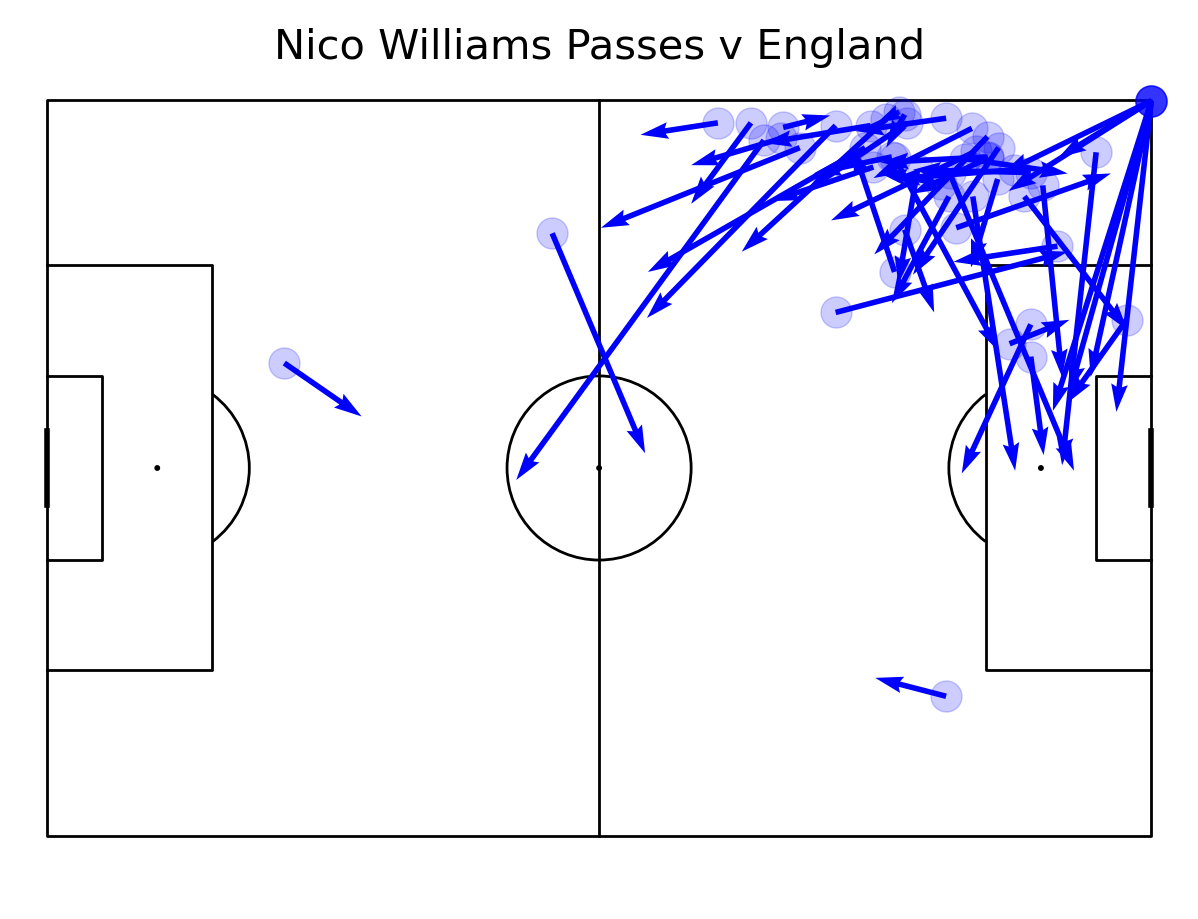

In [275]:
plot_player_passes(df_spain_matches[3941018]['event'], 'Nicholas Williams Arthuer', 'Nico Williams Passes v England')

In [238]:
def find_tournament_dangerous_passes(df, team, match_ids):
        #declare an empty dataframe
    danger_passes = pd.DataFrame()
    for idx in match_ids:
        #open the event data from this game 
        for period in [1, 2]:
            #keep only accurate passes by Team that were not set pieces in this period
            mask_pass = (df.team_name == team) & (df.type_name == "Pass") & (df.outcome_name.isnull()) & (df.period == period) & (df.sub_type_name.isnull()) 
            #keep only necessary columns
            passes = df.loc[mask_pass, ["x", "y", "end_x", "end_y", "minute", "second", "player_name"]]
            #keep only Shots by England in this period
            mask_shot = (df.team_name == team) & (df.type_name == "Shot") & (df.period == period)
            #keep only necessary columns
            shots = df.loc[mask_shot, ["minute", "second"]]
            #convert time to seconds
            shot_times = shots['minute']*60+shots['second']
            shot_window = 15  
            #find starts of the window
            shot_start = shot_times - shot_window
            #condition to avoid negative shot starts
            shot_start = shot_start.apply(lambda i: i if i>0 else (period-1)*45)
            #convert to seconds
            pass_times = passes['minute']*60+passes['second']
            #check if pass is in any of the windows for this half
            pass_to_shot = pass_times.apply(lambda x: True in ((shot_start < x) & (x < shot_times)).unique())
            
            #keep only danger passes
            danger_passes_period = passes.loc[pass_to_shot]
            #concatenate dataframe with a previous one to keep danger passes from the whole tournament
            danger_passes = pd.concat([danger_passes, danger_passes_period], ignore_index = True)
    return danger_passes

def plot_danger_passes_locations(danger_passes, team):
    #plot pitch
    pitch = Pitch(line_color='black')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
    #scatter the location on the pitch
    pitch.scatter(danger_passes.x, danger_passes.y, s=100, color='blue', edgecolors='grey', linewidth=1, alpha=0.2, ax=ax["pitch"])
    #uncomment it to plot arrows
    pitch.arrows(danger_passes.x, danger_passes.y, danger_passes.end_x, danger_passes.end_y, color = "blue", ax=ax['pitch'])
    #add title
    fig.suptitle('Location of danger passes by ' + team, fontsize = 30)
    plt.show()

In [151]:
df_pass = df_spain_matches[3943043]['event'][df_spain_matches[3943043]['event']['type_name'] == 'Pass']
df_pass.info()


<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 4 to 3306
Data columns (total 75 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              917 non-null    object 
 1   index                           917 non-null    int64  
 2   period                          917 non-null    int64  
 3   timestamp                       917 non-null    object 
 4   minute                          917 non-null    int64  
 5   second                          917 non-null    int64  
 6   possession                      917 non-null    int64  
 7   duration                        917 non-null    float64
 8   match_id                        917 non-null    int64  
 9   type_id                         917 non-null    int64  
 10  type_name                       917 non-null    object 
 11  possession_team_id              917 non-null    int64  
 12  possession_team_name            917 non-

In [162]:
df_pass_filtered = df_pass[['player_name', 'pass_recipient_name', 'outcome_name', 'sub_type_name', 'minute', 'timestamp', 'pass_length', 'pass_angle', 'body_part_name']]
df_pass_filtered[(df_pass_filtered['player_name'] == 'Nicholas Williams Arthuer') | (df_pass_filtered['pass_recipient_name'] == 'Nicholas Williams Arthuer')].head(60)
df_pass_filtered[(df_pass_filtered['pass_recipient_name'] == 'Nicholas Williams Arthuer')].head(60)

,player_name,pass_recipient_name,outcome_name,sub_type_name,minute,timestamp,pass_length,pass_angle,body_part_name
239,Aymeric Laporte,Nicholas Williams Arthuer,NaN,NaN,5,00:05:23.954000,14.746186,-0.246623,Left Foot
294,Marc Cucurella Saseta,Nicholas Williams Arthuer,NaN,NaN,6,00:06:21.275000,13.035720,-0.594386,Left Foot
337,Aymeric Laporte,Nicholas Williams Arthuer,NaN,NaN,7,00:07:02.072000,30.405920,-0.780747,Left Foot
343,Fabián Ruiz Peña,Nicholas Williams Arthuer,Incomplete,NaN,7,00:07:08.659000,6.118824,2.944197,Right Foot
347,Rodrigo Hernández Cascante,Nicholas Williams Arthuer,NaN,Recovery,7,00:07:10.743000,7.720104,-0.288975,Right Foot
476,Daniel Carvajal Ramos,Nicholas Williams Arthuer,Incomplete,NaN,10,00:10:57.693000,54.114784,-0.679359,Right Foot
485,Fabián Ruiz Peña,Nicholas Williams Arthuer,NaN,NaN,11,00:11:05.831000,34.607080,0.133315,Left Foot
524,Aymeric Laporte,Nicholas Williams Arthuer,NaN,NaN,13,00:13:45.958000,33.892180,-0.588003,Left Foot
753,Fabián Ruiz Peña,Nicholas Williams Arthuer,NaN,NaN,19,00:19:32.563000,25.109758,-0.864330,Left Foot
769,Daniel Olmo Carvajal,Nicholas Williams Arthuer,NaN,NaN,19,00:19:54.995000,26.332110,-1.289888,Left Foot


In [296]:
df_nico = df_spain_matches[3941018]['event'][df_spain_matches[3941018]['event']['player_name'] == 'Nicholas Williams Arthuer']
df_nico = df_nico[['type_name', 'pass_recipient_name', 'outcome_name', 'sub_type_name', 'minute', 'timestamp', 'pass_length', 'pass_angle', 'body_part_name', 'x', 'y', 'end_x', 'end_y']]

In [297]:
df_nico

,type_name,pass_recipient_name,outcome_name,sub_type_name,minute,timestamp,pass_length,pass_angle,body_part_name,x,y,end_x,end_y
44,Ball Receipt,NaN,NaN,NaN,0,00:00:43.166000,NaN,NaN,NaN,94.0,6.3,NaN,NaN
45,Carry,NaN,NaN,NaN,0,00:00:43.166000,NaN,NaN,NaN,94.0,6.3,114.0,5.7
46,Pass,NaN,Incomplete,NaN,0,00:00:48.594000,34.200730,1.679193,Left Foot,114.0,5.7,110.3,39.7
89,Ball Receipt,NaN,NaN,NaN,1,00:01:19.156000,NaN,NaN,NaN,91.2,5.2,NaN,NaN
90,Carry,NaN,NaN,NaN,1,00:01:19.156000,NaN,NaN,NaN,91.2,5.2,87.6,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3600,Carry,NaN,NaN,NaN,85,00:40:01.590000,NaN,NaN,NaN,58.0,4.9,85.7,23.1
3602,Pass,Mikel Oyarzabal Ugarte,NaN,NaN,85,00:40:05.984000,26.049952,-0.256151,Right Foot,85.7,23.1,110.9,16.5
3810,Ball Receipt,NaN,NaN,NaN,89,00:44:13.237000,NaN,NaN,NaN,92.2,12.6,NaN,NaN
3811,Carry,NaN,NaN,NaN,89,00:44:13.237000,NaN,NaN,NaN,92.2,12.6,104.8,29.5


In [210]:

df_first_goal = df_spain_matches[3943043]['event'][
    (df_spain_matches[3943043]['event']['minute'] >= 46) &
    (df_spain_matches[3943043]['event']['minute'] < 47) & (df_spain_matches[3943043]['event']['period'] == 2)
]
df_first_goal[['player_name', 'team_name', 'period', 'second','type_name', 'pass_recipient_name', 'outcome_name', 'sub_type_name', 'minute', 'timestamp', 'pass_length', 'pass_angle', 'body_part_name', 'x', 'y', 'end_x', 'end_y']]

,player_name,team_name,period,second,type_name,pass_recipient_name,outcome_name,sub_type_name,minute,timestamp,pass_length,pass_angle,body_part_name,x,y,end_x,end_y
1765,Fabián Ruiz Peña,Spain,2,1,Ball Receipt,NaN,NaN,NaN,46,00:01:01.817000,NaN,NaN,NaN,47.6,67.7,NaN,NaN
1766,Fabián Ruiz Peña,Spain,2,1,Carry,NaN,NaN,NaN,46,00:01:01.817000,NaN,NaN,NaN,47.6,67.7,49.7,68.1
1767,Fabián Ruiz Peña,Spain,2,2,Pass,Daniel Carvajal Ramos,NaN,NaN,46,00:01:02.313000,20.586647,0.326359,Left Foot,49.7,68.1,69.2,74.7
1768,Daniel Carvajal Ramos,Spain,2,3,Ball Receipt,NaN,NaN,NaN,46,00:01:03.744000,NaN,NaN,NaN,69.2,74.7,NaN,NaN
1769,Daniel Carvajal Ramos,Spain,2,3,Pass,Lamine Yamal Nasraoui Ebana,NaN,NaN,46,00:01:03.744000,27.808811,-0.515132,Right Foot,69.7,74.3,93.9,60.6
1770,Luke Shaw,England,2,6,Pressure,NaN,NaN,NaN,46,00:01:06.013000,NaN,NaN,NaN,28.4,18.9,NaN,NaN
1771,Lamine Yamal Nasraoui Ebana,Spain,2,6,Ball Receipt,NaN,NaN,NaN,46,00:01:06.123000,NaN,NaN,NaN,93.9,60.6,NaN,NaN
1772,Lamine Yamal Nasraoui Ebana,Spain,2,6,Carry,NaN,NaN,NaN,46,00:01:06.123000,NaN,NaN,NaN,93.9,60.6,100.6,47.0
1773,Lamine Yamal Nasraoui Ebana,Spain,2,8,Pass,Nicholas Williams Arthuer,NaN,NaN,46,00:01:08.079000,21.153960,-1.115605,Left Foot,100.6,47.0,109.9,28.0
1774,Nicholas Williams Arthuer,Spain,2,9,Ball Receipt,NaN,NaN,NaN,46,00:01:09.948000,NaN,NaN,NaN,109.9,28.0,NaN,NaN


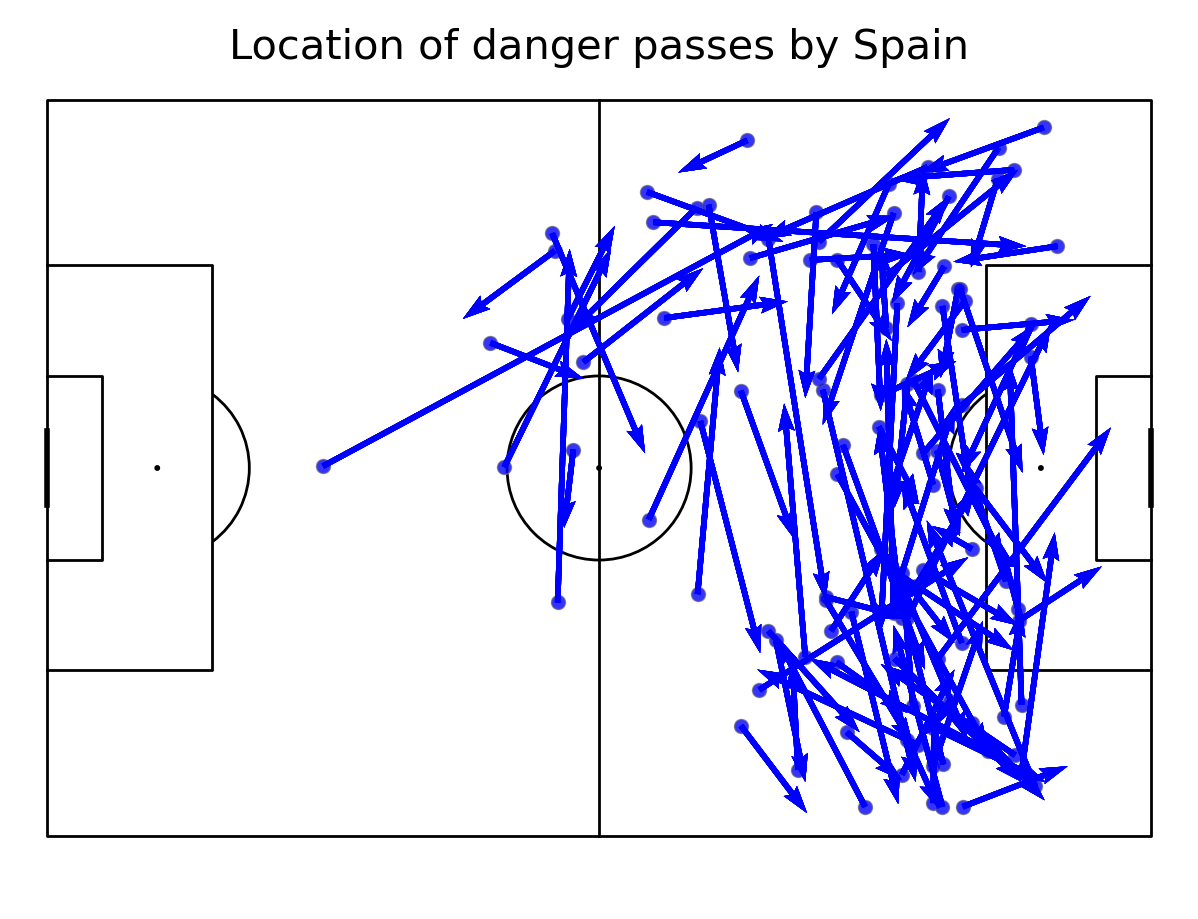

In [276]:
danger_passes = find_tournament_dangerous_passes(df_spain_matches[3941018]['event'], 'Spain', list(df_matches_spain['match_id']))
#danger_passes
plot_danger_passes_locations(danger_passes, 'Spain')

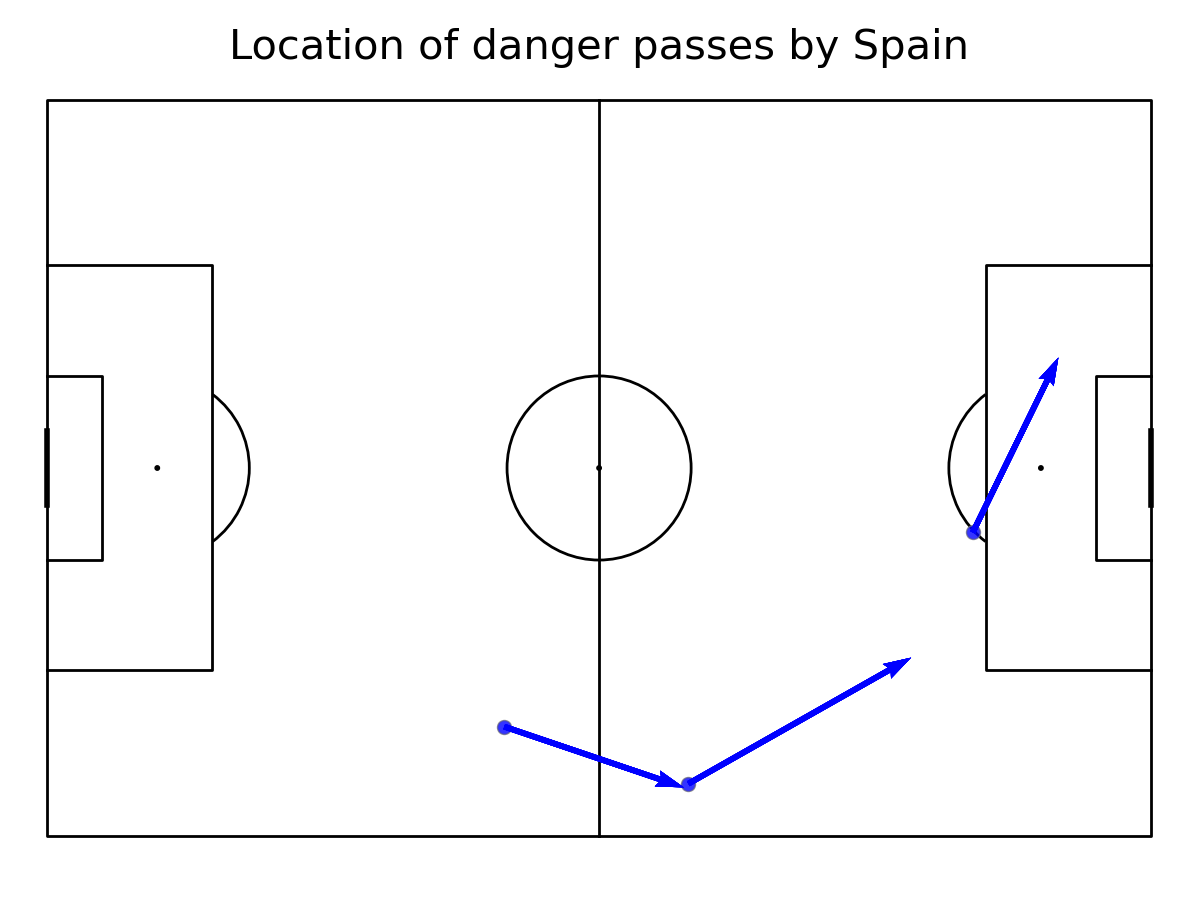

In [255]:
first_goal_danger_passes = find_tournament_dangerous_passes(df_first_goal, 'Spain', list(df_matches_spain['match_id']))
plot_danger_passes_locations(first_goal_danger_passes, 'Spain')

In [248]:
def plot_danger_passes_heatmap(df, team, match_ids):
    #plot vertical pitch
    no_games = len(match_ids)
    pitch = Pitch(line_zorder=2, line_color='black')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    #get the 2D histogram 
    bin_statistic = pitch.bin_statistic(danger_passes.x, danger_passes.y, statistic='count', bins=(6, 5), normalize=False)
    #normalize by number of games
    bin_statistic["statistic"] = bin_statistic["statistic"]/no_games
    #make a heatmap
    pcm  = pitch.heatmap(bin_statistic, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
    #legend to our plot
    ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
    cbar = plt.colorbar(pcm, cax=ax_cbar)
    fig.suptitle('Danger passes by ' + team + " per game", fontsize = 30)
    plt.show()

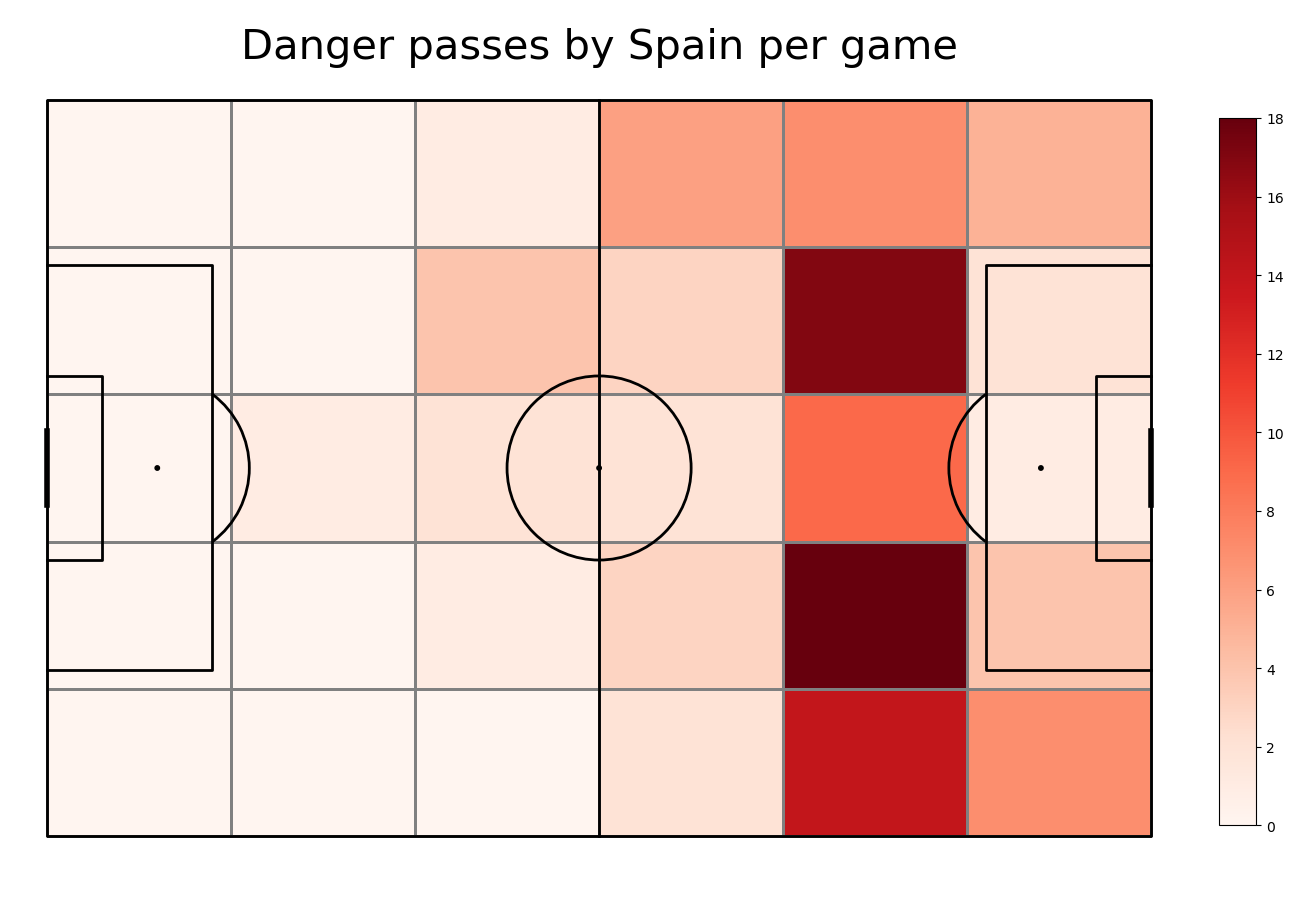

In [277]:
plot_danger_passes_heatmap(danger_passes, 'Spain', list(df_matches_spain['match_id']))

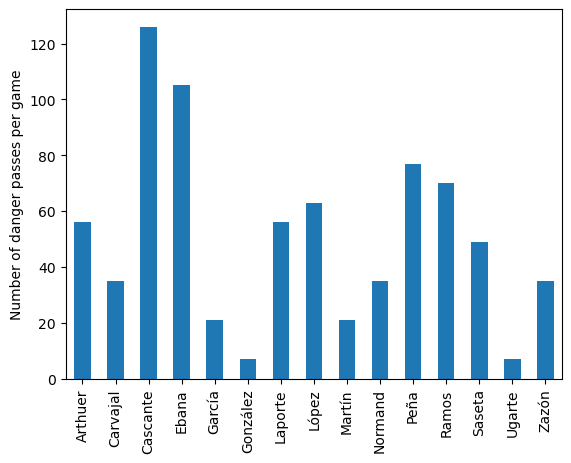

In [278]:
#keep only surnames
danger_passes["player_name"] = danger_passes["player_name"].apply(lambda x: str(x).split()[-1])
#count passes by player and normalize them
pass_count = danger_passes.groupby(["player_name"]).x.count()
#make a histogram
ax = pass_count.plot.bar(pass_count)
#make legend
ax.set_xlabel("")
ax.set_ylabel("Number of danger passes per game")
plt.show()

In [279]:
def plot_game_shots(df, team1, team2):
    #create pitch
    pitch = Pitch(line_color='black')
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)
    #query
    mask_team1 = (df.type_name == 'Shot') & (df.team_name == team1)
    #finding rows in the df and keeping only necessary columns
    df_team1 = df.loc[mask_team1, ['x', 'y', 'outcome_name', "player_name"]]
    
    #plot them - if shot ended with Goal - alpha 1 and add name
    #for England
    for i, row in df_team1.iterrows():
        if row["outcome_name"] == 'Goal':
        #make circle 
           pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch']) 
           pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
        else: 
           pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch']) 
           
    mask_team2 = (df.type_name == 'Shot') & (df.team_name == team2)
    df_team2 = df.loc[mask_team2, ['x', 'y', 'outcome_name', "player_name"]]   
    
    #for Sweden we need to revert coordinates
    for i, row in df_team2.iterrows():
        if row["outcome_name"] == 'Goal':
           pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch']) 
           pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 12)
        else: 
           pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch']) 
           
    fig.suptitle(f'{team1} (red) and {team2} (blue) shots', fontsize = 30)           
    plt.show()

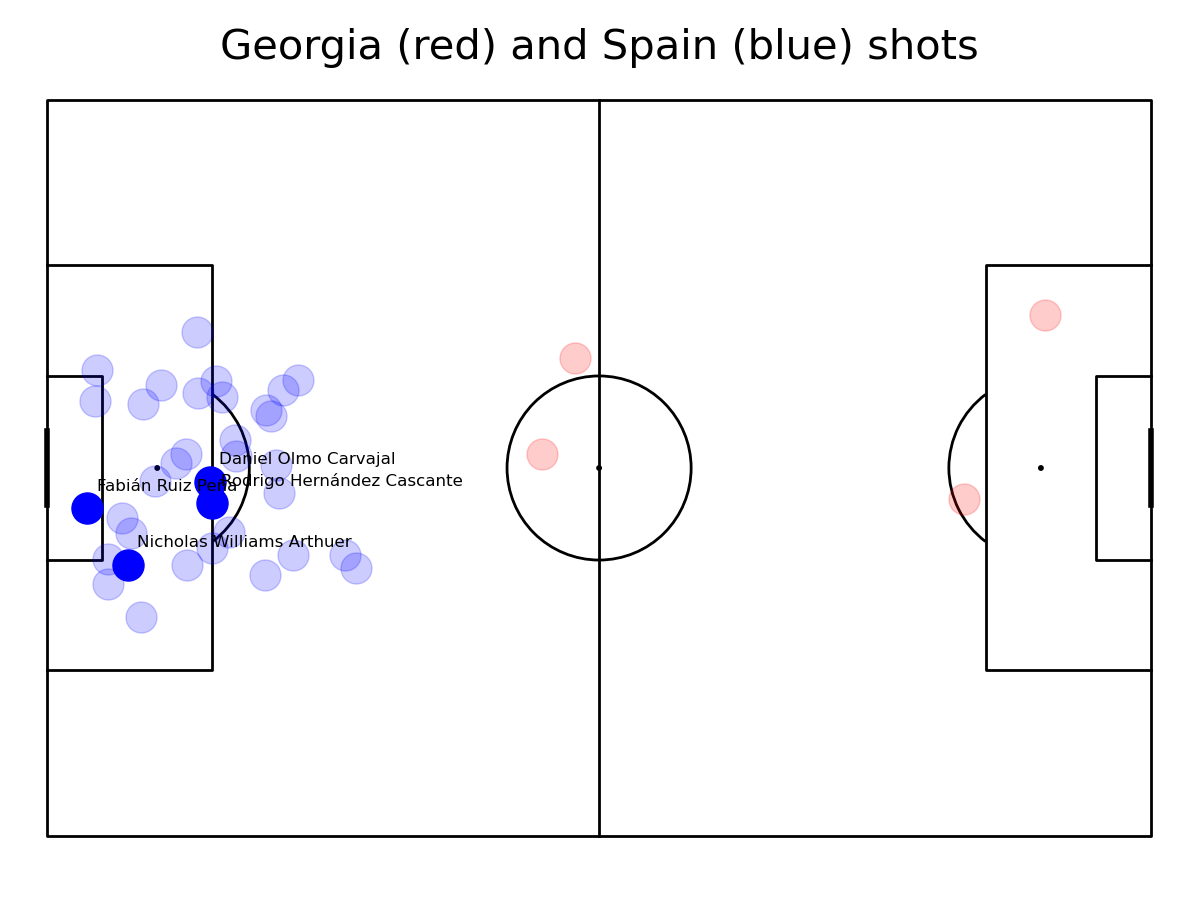

In [281]:
plot_game_shots(df_spain_matches[3941018]['event'], 'Georgia', 'Spain')

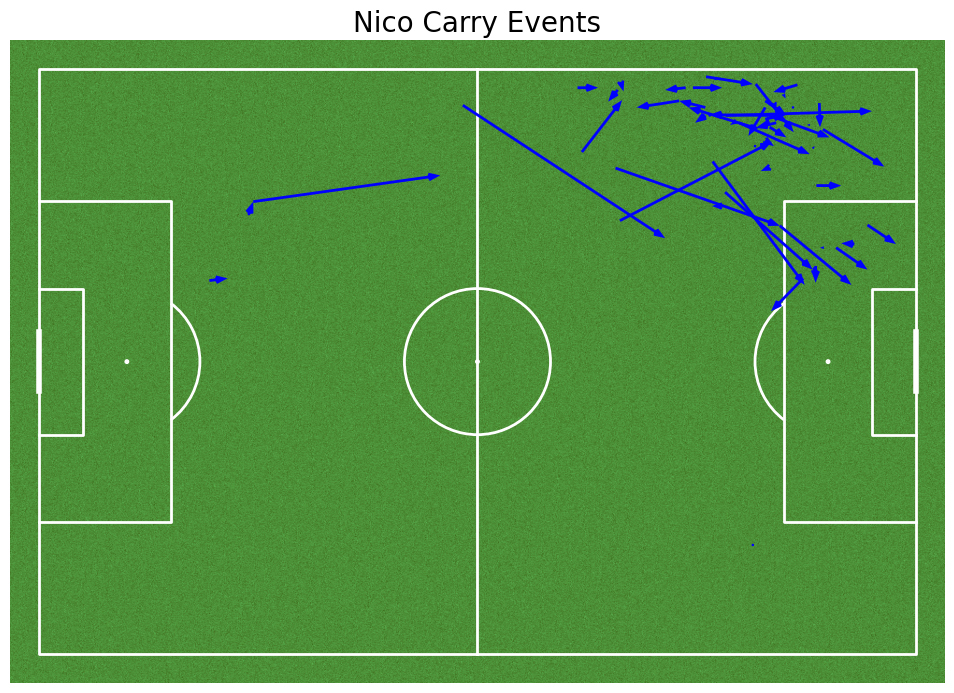

In [290]:
carry_events = df_nico[df_nico['type_name'] == 'Carry' ]

# Create a pitch for visualization
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')

# Create the plot
fig, ax = pitch.draw(figsize=(10, 7))

# Plot carries as arrows using x, y, end_x, and end_y
pitch.arrows(carry_events['x'],        # Start X coordinate
             carry_events['y'],        # Start Y coordinate
             carry_events['end_x'],    # End X coordinate
             carry_events['end_y'],    # End Y coordinate
             width=2, headwidth=3, headlength=4, color='blue', ax=ax)

# Add title
ax.set_title('Nico Carry Events', fontsize=20)
plt.show()

In [298]:
df_nico[(df_nico['minute']>=74) & (df_nico['minute']<75)]

,type_name,pass_recipient_name,outcome_name,sub_type_name,minute,timestamp,pass_length,pass_angle,body_part_name,x,y,end_x,end_y
3246,Ball Receipt,NaN,NaN,NaN,74,00:29:35.362000,NaN,NaN,NaN,78.9,13.5,NaN,NaN
3247,Carry,NaN,NaN,NaN,74,00:29:35.362000,NaN,NaN,NaN,78.9,13.5,101.4,21.4
3250,Dribble,NaN,Complete,NaN,74,00:29:38.312000,NaN,NaN,NaN,101.4,21.4,NaN,NaN
3251,Carry,NaN,NaN,NaN,74,00:29:38.312000,NaN,NaN,NaN,101.4,21.4,111.2,29.5
3252,Shot,NaN,Goal,Open Play,74,00:29:40.057000,NaN,NaN,Right Foot,111.2,29.5,120.0,39.2


### Compare players using Statistical methods

In [ ]:
# Significance test Spain's dribble success rate vs Georgia

In [ ]:
event_dataframes = []

# Loop through the dictionary of matches
for match_id, match_data in df_spain_matches.items():
    # Extract event data for the match
    events = match_data['event']  # Assuming 'event' is a list of dictionaries
    # Convert the event data to a DataFrame
    df_events = pd.DataFrame(events)
    # Add the match_id as a new column to track which match each event belongs to
    df_events['match_id'] = match_id
    # Append the DataFrame to the list
    event_dataframes.append(df_events)

# Concatenate all event DataFrames into one
all_events_df = pd.concat(event_dataframes, ignore_index=True)

In [344]:
# Successful dribbles per 90 from Williams  and Yamal

df_dribbles = df_spain_matches[3941018]['event'][df_spain_matches[3941018]['event']['type_name'] == 'Dribble']
df_dribbles_spain = df_dribbles[df_dribbles['team_name'] == 'Spain']
df_dribbles_georgia = df_dribbles[df_dribbles['team_name'] == 'Georgia']

In [345]:
# Step 2: Group by player_name and calculate total dribbles and successful dribbles
dribble_spain_stats = df_dribbles_spain.groupby(['player_name']).agg(
    total_dribbles=('type_name', 'size'),  # Count of dribbles
    successful_dribbles=('outcome_name', lambda x: (x == 'Complete').sum())  # Count of successful dribbles
)

dribble_georgia_stats = df_dribbles_georgia.groupby(['player_name']).agg(
    total_dribbles=('type_name', 'size'),  # Count of dribbles
    successful_dribbles=('outcome_name', lambda x: (x == 'Complete').sum())  # Count of successful dribbles
)


for df in [dribble_georgia_stats, dribble_spain_stats]:
    df['dribble_success_rate'] = df['successful_dribbles'] / df['total_dribbles']



In [349]:
dribble_georgia_stats.mean()

total_dribbles          3.333333
successful_dribbles     1.333333
dribble_success_rate    0.543651
dtype: float64

In [350]:
mean = dribble_spain_stats['dribble_success_rate'].mean()
std = dribble_spain_stats['dribble_success_rate'].std()
print('Spain typically had %.2f plus/minus %.2f dribble success rate against Georgia.'%(mean,std))
std_error=std/np.sqrt(len(dribble_spain_stats))
print('The standard error for successful dribbles is %.4f'%std_error)

mean = dribble_georgia_stats['dribble_success_rate'].mean()
std = dribble_georgia_stats['dribble_success_rate'].std()
print('Georgia typically had %.2f plus/minus %.2f dribble success rate against Spain.'%(mean,std))
std_error=std/np.sqrt(len(dribble_georgia_stats))
print('The standard error for successful dribbles is %.4f'%std_error)

Spain typically had 0.52 plus/minus 0.38 dribble success rate against Georgia.
The standard error for successful dribbles is 0.1716
Georgia typically had 0.54 plus/minus 0.39 dribble success rate against Spain.
The standard error for successful dribbles is 0.1604


In [355]:
from scipy.stats import ttest_ind
t, pvalue  = ttest_ind(a=dribble_spain_stats['dribble_success_rate'], b=dribble_georgia_stats['dribble_success_rate'], equal_var=True)

print("The t-staistic is %.2f and the P-value is %.2f."%(t,pvalue))
if pvalue < 0.05:
    print("We reject null hypothesis - Georgia and Spain have the same dribble success rate")
else:
    print("We cannot reject the null hypothesis that Georgia and Spain have the same dribble success rate")

The t-staistic is -0.11 and the P-value is 0.91.
We cannot reject the null hypothesis that Georgia and Spain have the same dribble success rate


### Calculate played minutes
Needed for Normalising metrics per 90

In [327]:
def calculate_minutes_played(events_df, match_duration=90):
    player_minutes = {}

    # Loop over each row in the DataFrame (each event)
    for index, row in events_df.iterrows():
        player_off = row['player_name']  # Player going off
        player_on = row['substitution_replacement_name']  # Player coming on
        minute = row['minute']  # Substitution minute
        
        # If the event is a substitution (player goes off)
        if row['type_name'] == 'Substitution':
            # Player going off (subtract their playing time until substitution minute)
            if player_off not in player_minutes:
                player_minutes[player_off] = minute  # Played until they were subbed off
            else:
                # If they were already subbed on and now subbed off, adjust their total minutes
                player_minutes[player_off] += minute - player_minutes[player_off]

            # Player coming on (add their playing time after the substitution minute)
            if player_on not in player_minutes:
                player_minutes[player_on] = match_duration - minute  # Played from sub minute to end
            else:
                # If they were subbed off again, adjust their minutes accordingly
                player_minutes[player_on] -= match_duration - minute

    return player_minutes

# Apply this function to calculate minutes played for each player
player_minutes = calculate_minutes_played(df_spain_matches[3941018]['event'])


In [328]:
player_minutes

{'Otar Kiteishvili': 40,
 'Sandro Altunashvili': 50,
 'Pedro González López': 51,
 'Daniel Olmo Carvajal': 39,
 'Luka Lochoshvili': 62,
 'Heorhii Tsitaishvili': 28,
 'Giorgi Chakvetadze': 62,
 'Zuriko Davitashvili': 28,
 'Marc Cucurella Saseta': 65,
 'Alejandro Grimaldo García': 25,
 'Álvaro Borja Morata Martín': 66,
 'Mikel Oyarzabal Ugarte': 24,
 'Giorgi Gvelesiani': 78,
 'Nika Kvekveskiri': 12,
 'Georges Mikautadze': 78,
 'Budu Zivzivadze': 12,
 'Daniel Carvajal Ramos': 80,
 'Jesús Navas González': 10,
 'Fabián Ruiz Peña': 80,
 'Mikel Merino Zazón': 10}

In [326]:
df_spain_matches[3941018]['event'][df_spain_matches[3941018]['event']['type_name'] == 'Substitution'][['minute','player_name', 'substitution_replacement_name']]

,minute,player_name,substitution_replacement_name
1704,40,Otar Kiteishvili,Sandro Altunashvili
2215,51,Pedro González López,Daniel Olmo Carvajal
2785,62,Luka Lochoshvili,Heorhii Tsitaishvili
2786,62,Giorgi Chakvetadze,Zuriko Davitashvili
2866,65,Marc Cucurella Saseta,Alejandro Grimaldo García
2867,66,Álvaro Borja Morata Martín,Mikel Oyarzabal Ugarte
3360,78,Giorgi Gvelesiani,Nika Kvekveskiri
3361,78,Georges Mikautadze,Budu Zivzivadze
3430,80,Daniel Carvajal Ramos,Jesús Navas González
3431,80,Fabián Ruiz Peña,Mikel Merino Zazón
